# Exproratory Data Analysis

In [89]:
pip install numpy pandas seaborn matplotlib geopandas ydata_profiling

  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.8.1-py3-none-any.whl (105 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [3]:
pip install --upgrade setuptools

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import geopandas as gpd
%matplotlib inline

c:\egyetem\github-ml\movielens-recommender\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Ratings

In [5]:
ratings_column_names = ['UserID', 'MovieID', 'Rating', 'Timestamp']

ratings_path = '../data/ml-1m-(raw)/ratings.dat'
ratings = pd.read_csv(ratings_path, header=None, sep='::', engine='python', names=ratings_column_names, encoding="latin-1")

print(ratings.head())

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


In [6]:
ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
duplicates = ratings[ratings.duplicated(keep=False)]
print(duplicates)
#no duplicates

Empty DataFrame
Columns: [UserID, MovieID, Rating, Timestamp, Date, Year]
Index: []


### Movie Ratings Distribution
How many of each ratings are there on the platform?

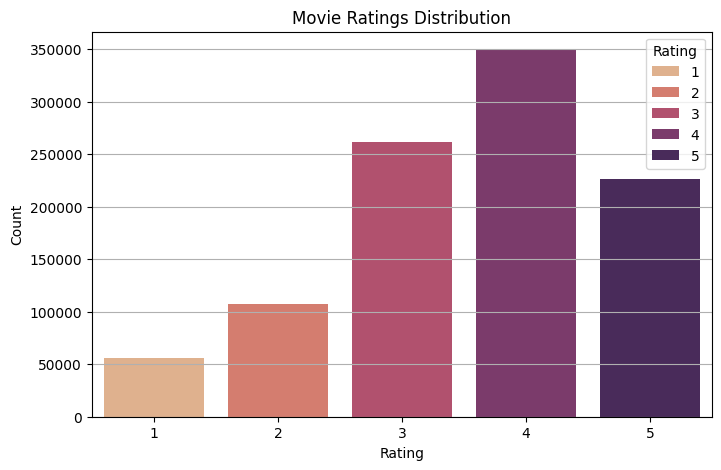

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=ratings, hue='Rating', palette='flare')
plt.title('Movie Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

### Top 10 Most Rated Movies
Which are the most watched movies?

In [ ]:
movie_rating_counts = ratings['MovieID'].value_counts().reset_index()
movie_rating_counts.columns = ['MovieID', 'NumberOfRatings']
top_10_most_rated = movie_rating_counts.sort_values('NumberOfRatings', ascending=False).head(10)
print(top_10_most_rated)

   MovieID  NumberOfRatings
0     2858             3428
1      260             2991
2     1196             2990
3     1210             2883
4      480             2672
5     2028             2653
6      589             2649
7     2571             2590
8     1270             2583
9      593             2578


In [10]:
#movies so we can see the movie names
movies_column_names = ["MovieID", "Title", "Genres"]

movies_path = '../data/ml-1m-(raw)/movies.dat'
movies = pd.read_csv(movies_path, header=None, sep='::', engine="python", names=movies_column_names, encoding="latin-1")

top_10_most_rated_with_titles = pd.merge(top_10_most_rated, movies[['MovieID', 'Title']], on='MovieID', how='left')
print(top_10_most_rated_with_titles.head(10))

   MovieID  NumberOfRatings                                              Title
0     2858             3428                             American Beauty (1999)
1      260             2991          Star Wars: Episode IV - A New Hope (1977)
2     1196             2990  Star Wars: Episode V - The Empire Strikes Back...
3     1210             2883  Star Wars: Episode VI - Return of the Jedi (1983)
4      480             2672                               Jurassic Park (1993)
5     2028             2653                         Saving Private Ryan (1998)
6      589             2649                  Terminator 2: Judgment Day (1991)
7     2571             2590                                 Matrix, The (1999)
8     1270             2583                          Back to the Future (1985)
9      593             2578                   Silence of the Lambs, The (1991)


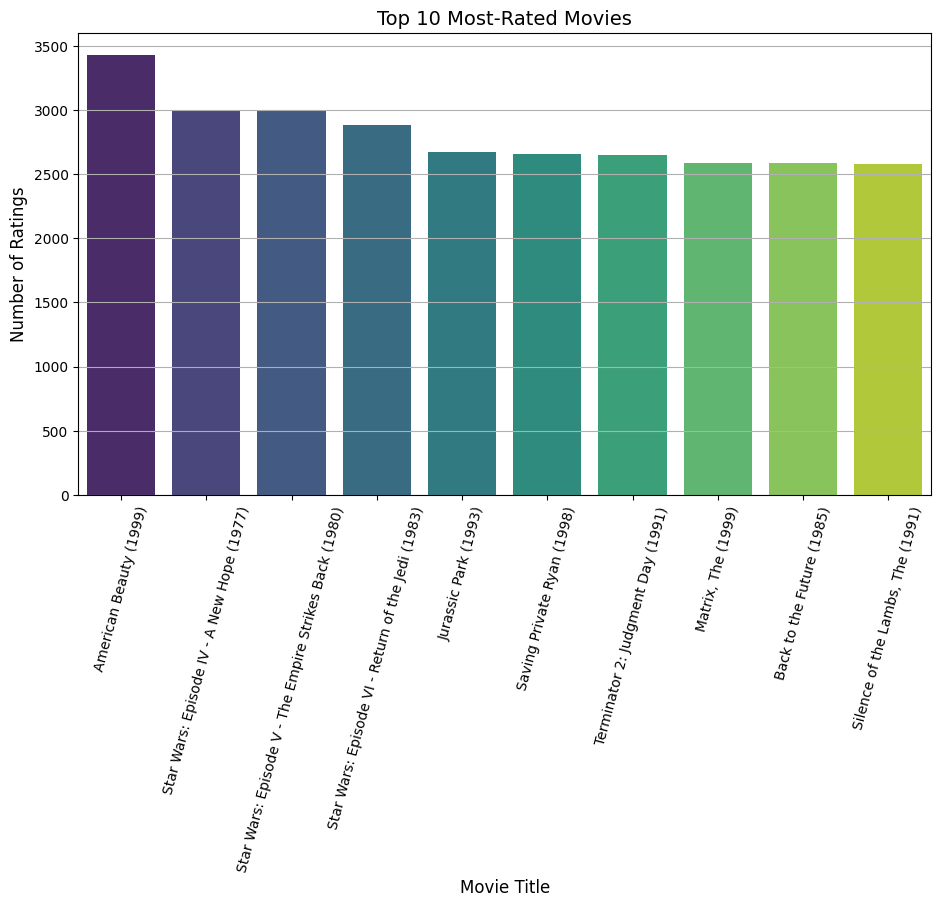

In [11]:
plt.figure(figsize=(11, 6))
sns.barplot(x='Title', y='NumberOfRatings', data=top_10_most_rated_with_titles, hue='Title', palette='viridis', legend=False)
plt.title('Top 10 Most-Rated Movies', fontsize=14)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.show()

### Top 10 Highest Rated Movies
Which are the most liked movies?

In [ ]:
movie_rating_mean = ratings.groupby('MovieID')['Rating'].agg(['mean', 'count'])
movie_rating_mean.columns = ['MeanRating', 'RatingCount']

print(movie_rating_mean.head())


         MeanRating  RatingCount
MovieID                         
1          4.146846         2077
2          3.201141          701
3          3.016736          478
4          2.729412          170
5          3.006757          296


In [13]:
#filter out movies with unsignificant rating count
min_ratings = 50
high_rated = movie_rating_mean[movie_rating_mean['RatingCount'] >= min_ratings]
top_10_highest_rated = high_rated.sort_values('MeanRating', ascending=False).head(10)
top_10_highest_rated

,MeanRating,RatingCount
MovieID,,
2905,4.608696,69
2019,4.560510,628
318,4.554558,2227
858,4.524966,2223
745,4.520548,657
50,4.517106,1783
527,4.510417,2304
1148,4.507937,882
922,4.491489,470


In [14]:
#movies so we can see the movie names
movies_column_names = ["MovieID", "Title", "Genres"]

movies_path = '../data/ml-1m-(raw)/movies.dat'
movies = pd.read_csv(movies_path, header=None, sep='::', engine="python", names=movies_column_names, encoding="latin-1")

top_10_highest_rated_with_titles = pd.merge(top_10_highest_rated, movies[['MovieID', 'Title']], on='MovieID', how='left')
print(top_10_highest_rated_with_titles.head(10))

   MovieID  MeanRating  RatingCount  \
0     2905    4.608696           69   
1     2019    4.560510          628   
2      318    4.554558         2227   
3      858    4.524966         2223   
4      745    4.520548          657   
5       50    4.517106         1783   
6      527    4.510417         2304   
7     1148    4.507937          882   
8      922    4.491489          470   
9     1198    4.477725         2514   

                                               Title  
0                                     Sanjuro (1962)  
1  Seven Samurai (The Magnificent Seven) (Shichin...  
2                   Shawshank Redemption, The (1994)  
3                              Godfather, The (1972)  
4                              Close Shave, A (1995)  
5                         Usual Suspects, The (1995)  
6                            Schindler's List (1993)  
7                         Wrong Trousers, The (1993)  
8      Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)  
9                   

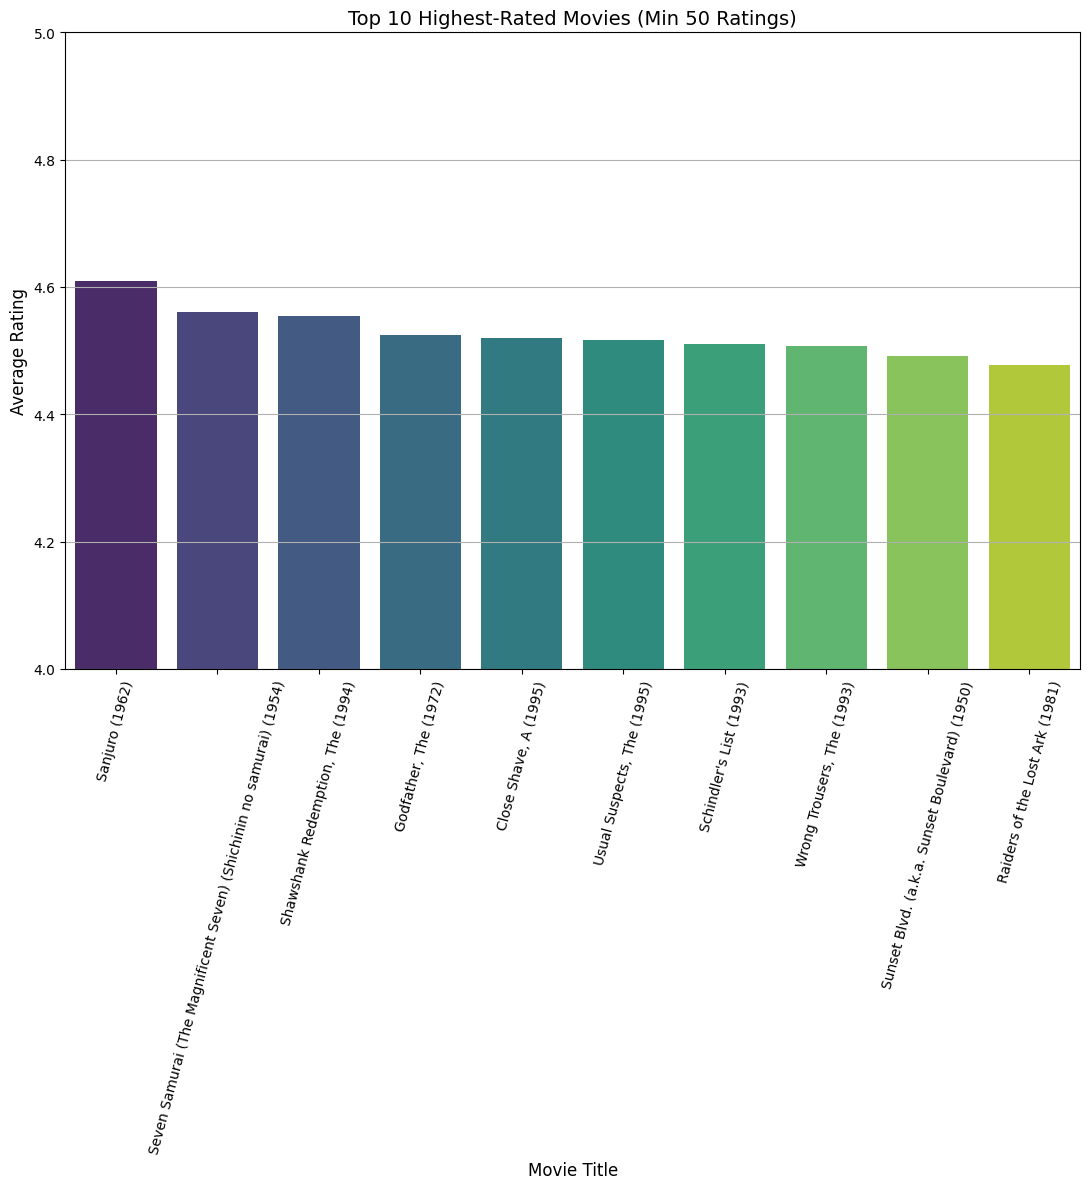

In [15]:
plt.figure(figsize=(11, 12))
sns.barplot(data=top_10_highest_rated_with_titles, x='Title', y='MeanRating', hue='Title', palette='viridis')
plt.title('Top 10 Highest-Rated Movies (Min 50 Ratings)', fontsize=14)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.ylim(4, 5)
plt.tight_layout()
plt.show()

### Rating Trends Over Time
How many ratings were each year?

In [16]:
#Ratings over time
ratings
ratings['Date'] = pd.to_datetime(ratings['Timestamp'], unit='s')
#ratings.drop('Date', axis=1, inplace=True)
ratings['Year'] = ratings['Date'].dt.year
#ratings.drop('Year', axis=1, inplace=True)
print(ratings.head())


   UserID  MovieID  Rating  Timestamp                Date  Year
0       1     1193       5  978300760 2000-12-31 22:12:40  2000
1       1      661       3  978302109 2000-12-31 22:35:09  2000
2       1      914       3  978301968 2000-12-31 22:32:48  2000
3       1     3408       4  978300275 2000-12-31 22:04:35  2000
4       1     2355       5  978824291 2001-01-06 23:38:11  2001


In [17]:
#amount of ratings each year
#Are there more or less ratings over time? Are they biased toward a higher or lower rating over time?
ratings_by_year = ratings.groupby('Year')['Rating'].agg(['count', 'mean'])

print(ratings_by_year)

       count      mean
Year                  
2000  904757  3.590392
2001   68058  3.512254
2002   24046  3.458829
2003    3348  3.486559


In [18]:
#amount of each rating by year and mean
ratings_by_year_count = ratings.groupby(['Year', 'Rating'])['Rating'].count().unstack()

print(ratings_by_year_count)

Rating      1      2       3       4       5
Year                                        
2000    51027  96069  234296  314446  208919
2001     3539   7986   19150   24839   12544
2002     1356   3113    6898    8500    4179
2003      252    389     853    1186     668


In [19]:
#combined table of both total amount of ratings and mean, also amounts of individual ratings each year
ratings_by_year = ratings_by_year.join(ratings_by_year_count)

print(ratings_by_year)

       count      mean      1      2       3       4       5
Year                                                        
2000  904757  3.590392  51027  96069  234296  314446  208919
2001   68058  3.512254   3539   7986   19150   24839   12544
2002   24046  3.458829   1356   3113    6898    8500    4179
2003    3348  3.486559    252    389     853    1186     668


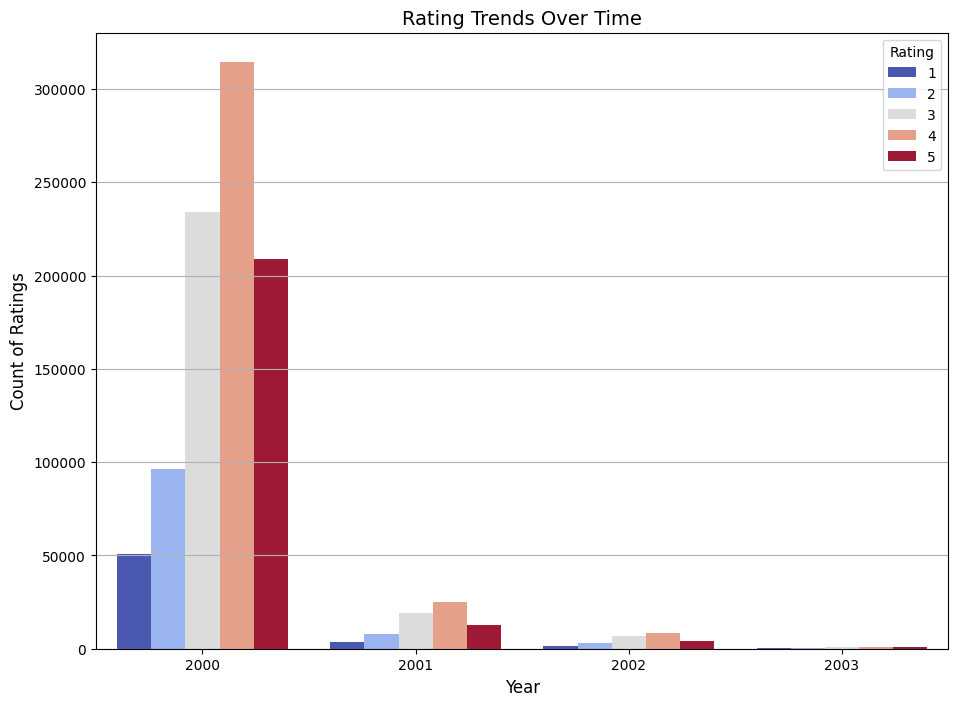

In [20]:
plt.figure(figsize=(11, 8))
sns.countplot(x='Year', data=ratings, hue='Rating', palette='coolwarm')
plt.title('Rating Trends Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Ratings', fontsize=12)
plt.grid(axis='y')
plt.show()

### User Rating Behaviour
Are there people who mostly rate low or high?

In [90]:
user_rating_behaviour = ratings.groupby('UserID')['Rating'].agg(['mean', 'count'])
user_rating_behaviour.columns = ['AvgRating', 'TotalRatings']

print(user_rating_behaviour.head())

        AvgRating  TotalRatings
UserID                         
1        4.188679            53
2        3.713178           129
3        3.901961            51
4        4.190476            21
5        3.146465           198


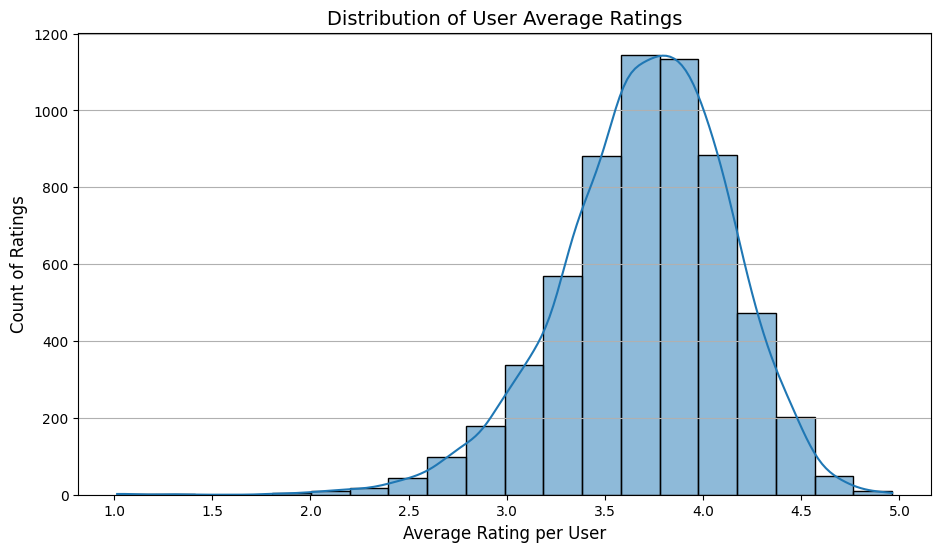

In [91]:
#Distribution of user average ratings
plt.figure(figsize=(11, 6))
sns.histplot(user_rating_behaviour['AvgRating'], bins=20, kde=True)
plt.title('Distribution of User Average Ratings', fontsize=14)
plt.xlabel('Average Rating per User', fontsize=12)
plt.ylabel('Count of Ratings', fontsize=12)
plt.grid(axis='y')
plt.show()

### Rating Distribution by Movie Genre
Most liked movie genres?

In [ ]:
movies_column_names = ["MovieID", "Title", "Genres"]

movies_path = '../data/ml-1m-(raw)/movies.dat'
movies = pd.read_csv(movies_path, header=None, sep='::', engine="python", names=movies_column_names, encoding="latin-1")

print(movies.head())

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [93]:
#split genres into individual rows
movies_exploded = movies.assign(Genres=movies['Genres'].str.split('|')).explode('Genres')
print(movies_exploded.head())

   MovieID             Title      Genres
0        1  Toy Story (1995)   Animation
0        1  Toy Story (1995)  Children's
0        1  Toy Story (1995)      Comedy
1        2    Jumanji (1995)   Adventure
1        2    Jumanji (1995)  Children's


In [94]:
#Merge with ratings and get rating per genre
genre_ratings = pd.merge(ratings, movies_exploded, on='MovieID')
genre_avg = genre_ratings.groupby('Genres')['Rating'].mean().sort_values(ascending=False)
print(genre_avg.head(10))

Genres
Film-Noir      4.075188
Documentary    3.933123
War            3.893327
Drama          3.766332
Crime          3.708679
Animation      3.684868
Mystery        3.668102
Musical        3.665519
Western        3.637770
Romance        3.607465
Name: Rating, dtype: float64


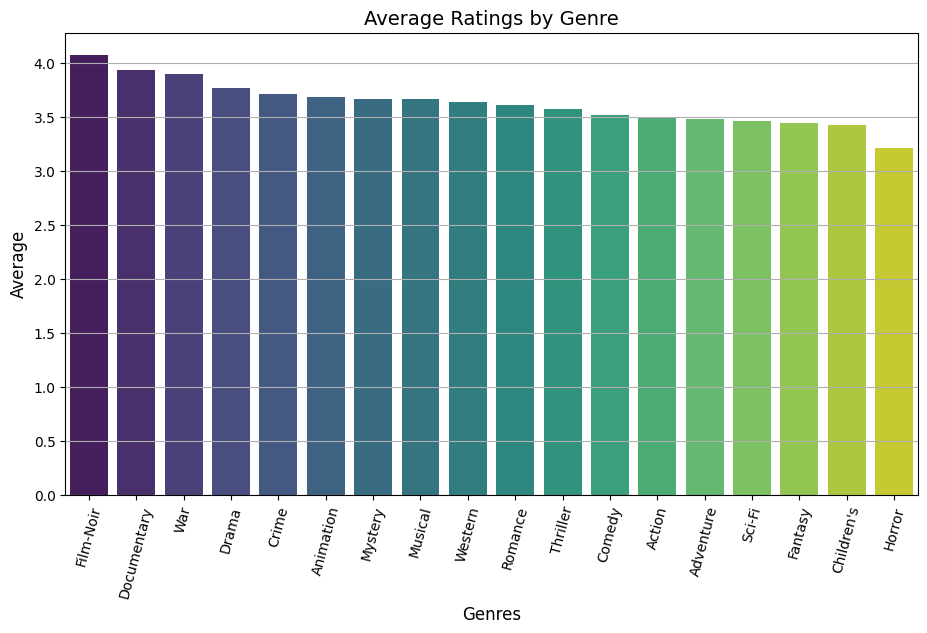

In [95]:
#Plot
plt.figure(figsize=(11, 6))
sns.barplot(x=genre_avg.index, y=genre_avg.values, palette='viridis', hue=genre_avg.index)
plt.title('Average Ratings by Genre', fontsize=14)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Average', fontsize=12)
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.show()

### Rating Frequency vs. Average Rating
Are movies with more ratings rated higher?

In [ ]:
movie_stats = ratings.groupby('MovieID')['Rating'].agg(['mean', 'count'])
movie_stats.columns = ['AvgRatings', 'NumRatings']

print(movie_stats.head())

         AvgRatings  NumRatings
MovieID                        
1          4.146846        2077
2          3.201141         701
3          3.016736         478
4          2.729412         170
5          3.006757         296


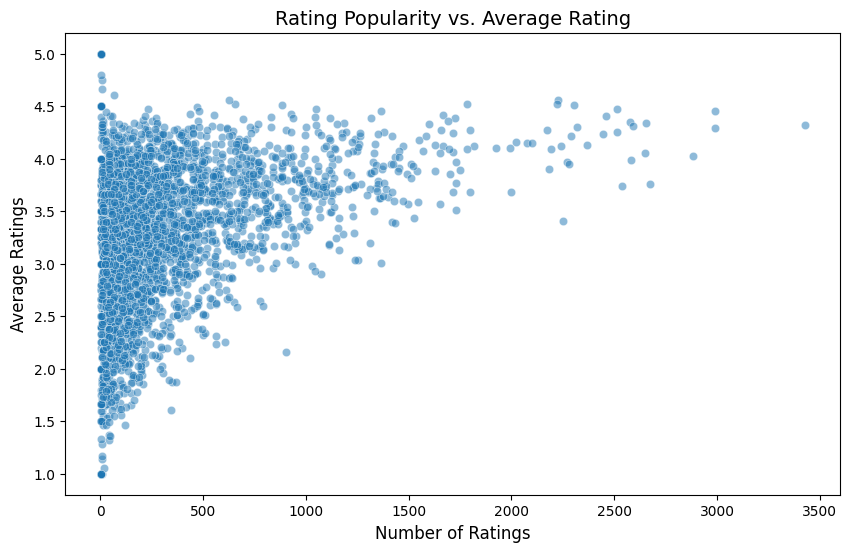

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumRatings', y='AvgRatings', data=movie_stats, alpha=0.5)
plt.title('Rating Popularity vs. Average Rating', fontsize=14)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Average Ratings', fontsize=12)
plt.show()

### Distribution of Rating per User
Do a small number of users dominate the ratings?

In [ ]:
user_rating_count = ratings['UserID'].value_counts()
user_rating_count.sort_values(ascending=False)

UserID
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
708       20
703       20
665       20
2160      20
4749      20
Name: count, Length: 6040, dtype: int64

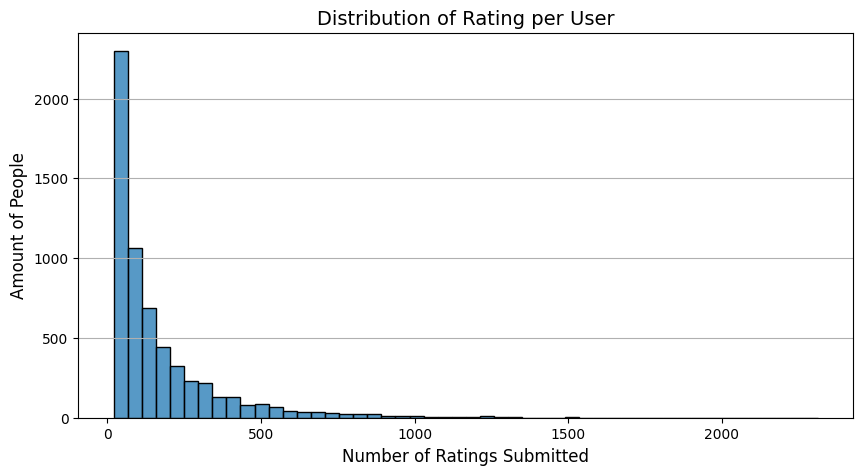

In [99]:
plt.figure(figsize=(10, 5))
sns.histplot(user_rating_count, bins=50)
plt.title('Distribution of Rating per User', fontsize=14)
plt.xlabel('Number of Ratings Submitted', fontsize=12)
plt.ylabel('Amount of People', fontsize=12)
plt.grid(axis='y')
plt.show()

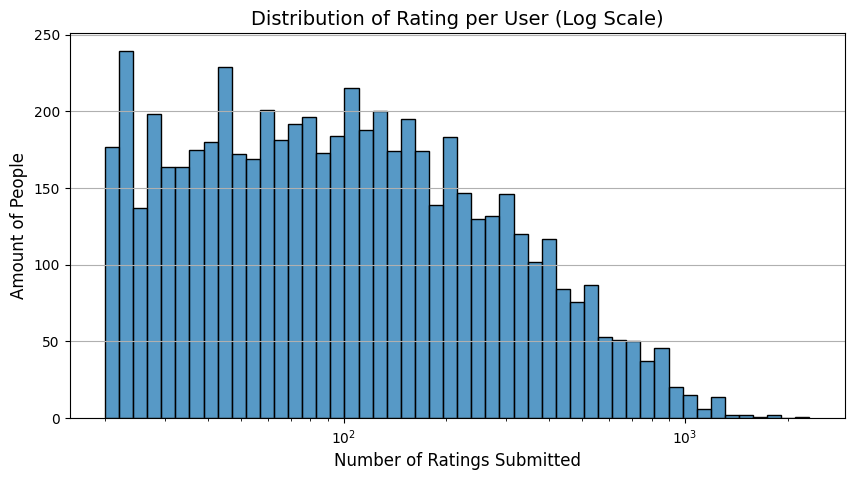

In [100]:
plt.figure(figsize=(10, 5))
sns.histplot(user_rating_count, bins=50, log_scale=True)
plt.title('Distribution of Rating per User (Log Scale)', fontsize=14)
plt.xlabel('Number of Ratings Submitted', fontsize=12)
plt.ylabel('Amount of People', fontsize=12)
plt.grid(axis='y')
plt.show()

Eda report

In [101]:
ratings_report = ProfileReport(ratings, title='Ratings')
ratings_report.to_file('../eda_reports/ratings_report.html')

Summarize dataset:  62%|██████▏   | 8/13 [00:02<00:01,  4.45it/s, Calculate auto correlation]c:\egyetem\github-ml\movielens-recommender\.venv\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 130.04it/s]


## Users

In [33]:
users_column_names = ["UserID", "Gender", "Age", "Occupation", "Zip-code"]

users_path = '../data/ml-1m-(raw)/users.dat'
users = pd.read_csv(users_path, header=None, sep='::', engine="python", names=users_column_names, encoding="latin-1")

print(users.head())

   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


In [34]:
users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [35]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
duplicates = users[users.duplicated(keep=False)]
print(duplicates)
#no duplicates

Empty DataFrame
Columns: [UserID, Gender, Age, Occupation, Zip-code]
Index: []


### Age of Users

In [ ]:
age_mapping = {
    1: 'Under 18',
    18: '18-24',
    25: '25-34',
    35: '35-44',
    45: '45-49',
    50: '50-55',
    56: '56+'
}
users_age = users.copy()
users_age['AgeGroup'] = users_age['Age'].map(age_mapping)

print(users_age.head())

   UserID Gender  Age  Occupation Zip-code  AgeGroup
0       1      F    1          10    48067  Under 18
1       2      M   56          16    70072       56+
2       3      M   25          15    55117     25-34
3       4      M   45           7    02460     45-49
4       5      M   25          20    55455     25-34


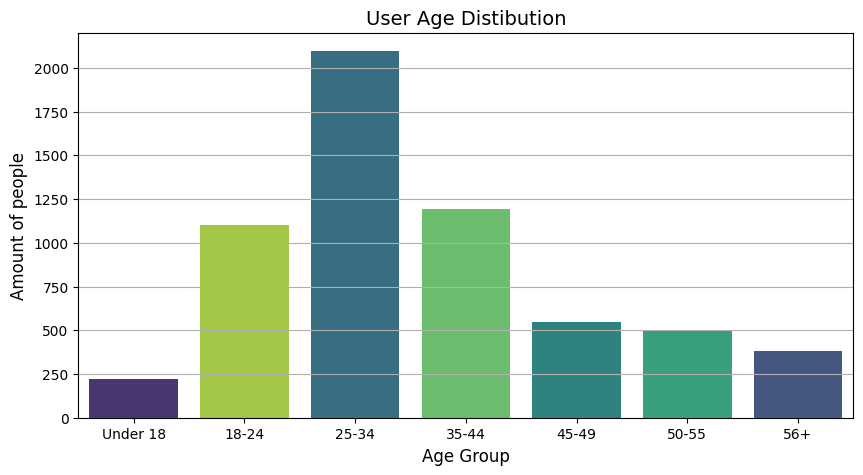

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='AgeGroup',
              data=users_age,
              order=['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+'],
              palette='viridis',
              hue='AgeGroup')
plt.title('User Age Distibution', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Amount of people', fontsize=12)
plt.grid(axis='y')
plt.show()

### Gender of Users


In [ ]:
users_gender = users['Gender'].value_counts()
users_gender

Gender
M    4331
F    1709
Name: count, dtype: int64

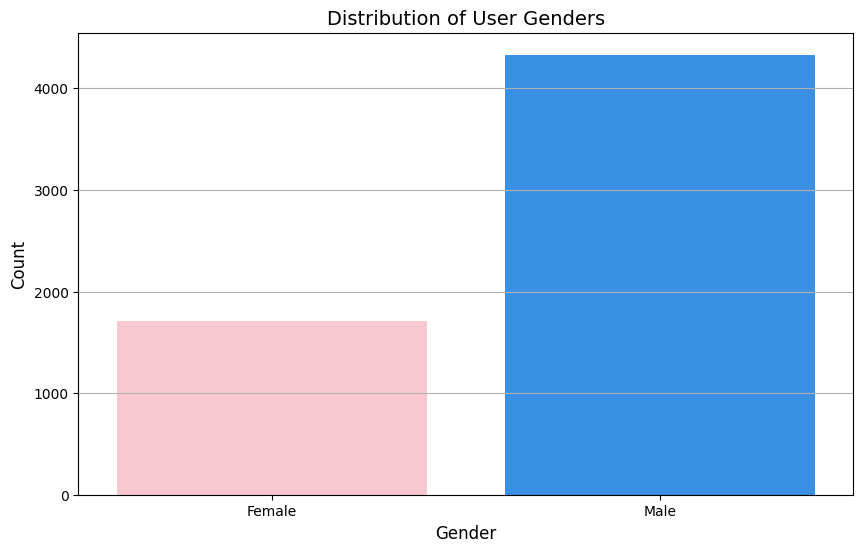

In [39]:
users_gender = users.copy()
users_gender['Gender_full'] = users_gender['Gender'].map({'M': 'Male', 'F': 'Female'})

plt.figure(figsize=(10,6))
sns.countplot(
    data=users_gender,
    x='Gender_full',
    hue='Gender_full',
    palette={'Male': 'dodgerblue', 'Female': 'pink'},
    hue_order=['Male', 'Female']
)

plt.title('Distribution of User Genders', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')
plt.show()

### Age and Gender of users


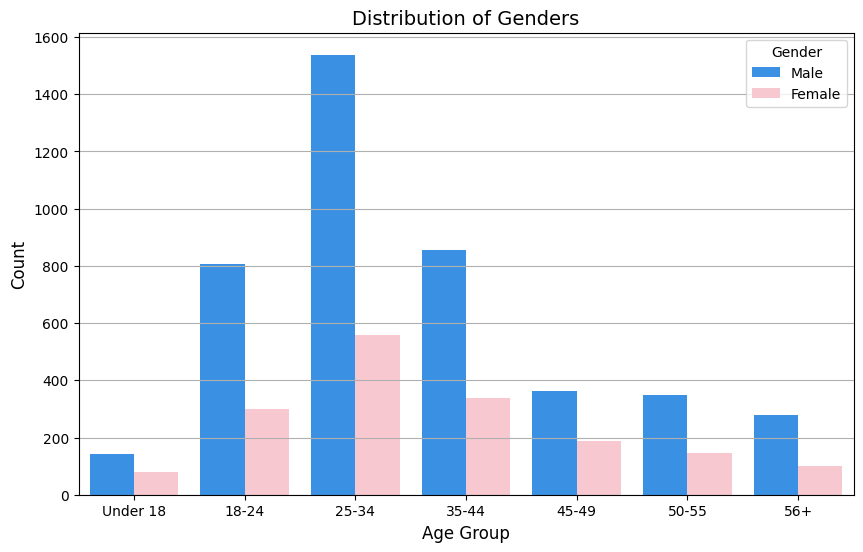

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='AgeGroup',
    data=users_age,
    hue='Gender',
    order=['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+'],
    palette={'M': 'dodgerblue', 'F': 'pink'},
    hue_order=['M', 'F']  # Ensure order is consistent
)

# Override legend labels
ax.legend(
    title='Gender',
    labels=['Male', 'Female'],  # Map M → Male, F → Female
    handles=ax.legend_.legend_handles  # Preserve original colors
)
plt.title('Distribution of Genders', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')
plt.show()

### User Number by Occupation
Which occupations watch movies more?

In [ ]:
occupation_mapping = {
    0:  "other/not specified",
	1:  "academic/educator",
	2:  "artist",
	3:  "clerical/admin",
	4:  "college/grad student",
	5:  "customer service",
	6:  "doctor/health care",
	7:  "executive/managerial",
	8:  "farmer",
	9:  "homemaker",
	10:  "K-12 student",
	11:  "lawyer",
	12:  "programmer",
	13:  "retired",
	14:  "sales/marketing",
	15:  "scientist",
	16:  "self-employed",
	17:  "technician/engineer",
	18:  "tradesman/craftsman",
	19:  "unemployed",
	20:  "writer"
}

users_occupation = users.copy()
users_occupation['Occupation_name'] = users_occupation['Occupation'].map(occupation_mapping)
users_occupation.head(10)

,UserID,Gender,Age,Occupation,Zip-code,Occupation_name
0,1,F,1,10,48067,K-12 student
1,2,M,56,16,70072,self-employed
2,3,M,25,15,55117,scientist
3,4,M,45,7,02460,executive/managerial
4,5,M,25,20,55455,writer
5,6,F,50,9,55117,homemaker
6,7,M,35,1,06810,academic/educator
7,8,M,25,12,11413,programmer
8,9,M,25,17,61614,technician/engineer
9,10,F,35,1,95370,academic/educator


In [42]:
users_occupation_count = users_occupation['Occupation_name'].value_counts().reset_index()
users_occupation_count.columns = ['Occupation_name', 'Count']
users_occupation_count = users_occupation_count.sort_values('Count', ascending=False)

users_occupation_count

,Occupation_name,Count
0,college/grad student,759
1,other/not specified,711
2,executive/managerial,679
3,academic/educator,528
4,technician/engineer,502
5,programmer,388
6,sales/marketing,302
7,writer,281
8,artist,267
9,self-employed,241


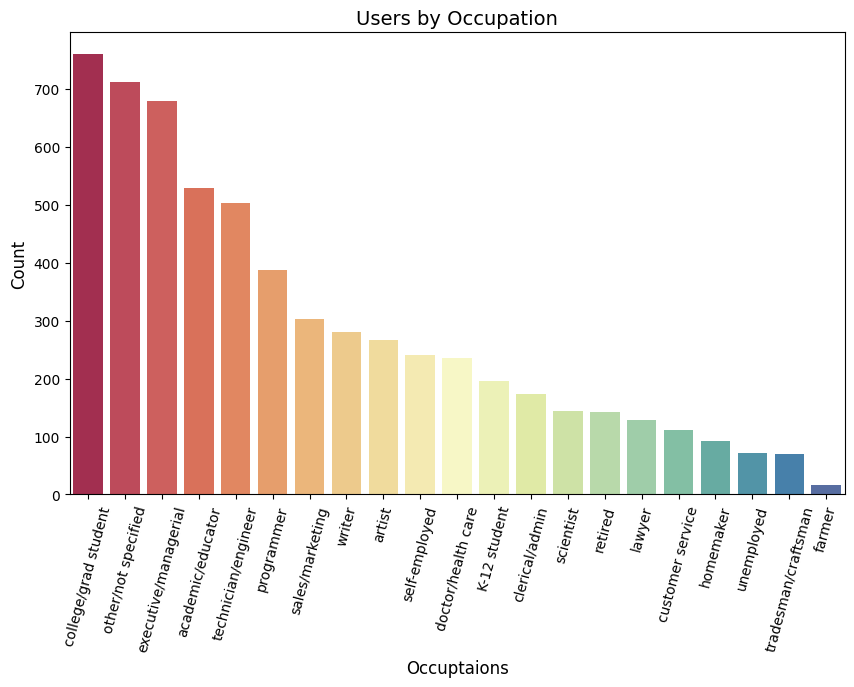

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=users_occupation_count,
    x='Occupation_name',
    y='Count',
    hue='Occupation_name',
    palette='Spectral'
)
plt.title('Users by Occupation', fontsize=14)
plt.xlabel('Occuptaions', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=75)
plt.show()

### Users by Occupation and Gender
Just for fun

In [ ]:
users_occupation_gender = users.copy()
users_occupation_gender['Gender_full'] = users_occupation_gender['Gender'].map({'M': 'Male', 'F': 'Female'})
users_occupation_gender['Occupation_name'] = users_occupation_gender['Occupation'].map(occupation_mapping)
users_occupation_gender.head()

,UserID,Gender,Age,Occupation,Zip-code,Gender_full,Occupation_name
0,1,F,1,10,48067,Female,K-12 student
1,2,M,56,16,70072,Male,self-employed
2,3,M,25,15,55117,Male,scientist
3,4,M,45,7,02460,Male,executive/managerial
4,5,M,25,20,55455,Male,writer


In [45]:
occupation_gender_counts = (
    users_occupation_gender.groupby(['Occupation_name', 'Gender_full']).size().reset_index(name='Count')
)

occupation_gender_counts

,Occupation_name,Gender_full,Count
0,K-12 student,Female,66
1,K-12 student,Male,129
2,academic/educator,Female,209
3,academic/educator,Male,319
4,artist,Female,91
5,artist,Male,176
6,clerical/admin,Female,100
7,clerical/admin,Male,73
8,college/grad student,Female,234
9,college/grad student,Male,525


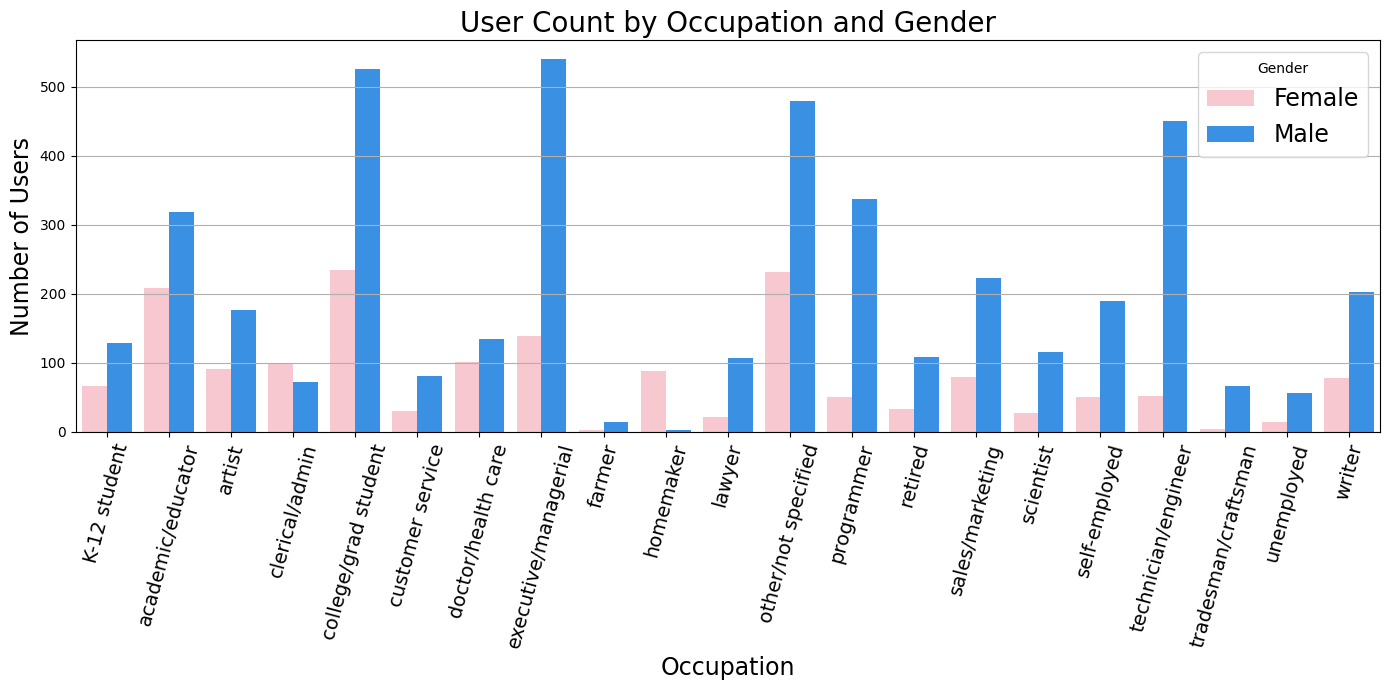

In [46]:
plt.figure(figsize=(14,7))
sns.barplot(
    data=occupation_gender_counts,
    x='Occupation_name',
    y='Count',
    hue='Gender_full',
    palette={'Male': 'dodgerblue', 'Female': 'pink'}
)
plt.xticks(rotation=75, fontsize=14)
plt.title('User Count by Occupation and Gender', fontsize=20)
plt.xlabel('Occupation', fontsize=17)
plt.ylabel('Number of Users', fontsize=17)
plt.legend(title='Gender', fontsize=17)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [47]:
#Users by Occupation and Gender (Percentage Based)
users_occupation_gender = users.copy()
users_occupation_gender['Gender_full'] = users_occupation_gender['Gender'].map({'M': 'Male', 'F': 'Female'})
users_occupation_gender['Occupation_name'] = users_occupation_gender['Occupation'].map(occupation_mapping)
users_occupation_gender.head()

,UserID,Gender,Age,Occupation,Zip-code,Gender_full,Occupation_name
0,1,F,1,10,48067,Female,K-12 student
1,2,M,56,16,70072,Male,self-employed
2,3,M,25,15,55117,Male,scientist
3,4,M,45,7,02460,Male,executive/managerial
4,5,M,25,20,55455,Male,writer


In [48]:
occupation_gender_counts = (
    users_occupation_gender.groupby(['Occupation_name', 'Gender_full']).size().reset_index(name='Count')
)

#total per occupation
totals = occupation_gender_counts.groupby('Occupation_name')['Count'].transform('sum')
#percentage column added
occupation_gender_counts['Percentage'] = occupation_gender_counts['Count'] / totals * 100

occupation_gender_counts

,Occupation_name,Gender_full,Count,Percentage
0,K-12 student,Female,66,33.846154
1,K-12 student,Male,129,66.153846
2,academic/educator,Female,209,39.583333
3,academic/educator,Male,319,60.416667
4,artist,Female,91,34.082397
5,artist,Male,176,65.917603
6,clerical/admin,Female,100,57.803468
7,clerical/admin,Male,73,42.196532
8,college/grad student,Female,234,30.830040
9,college/grad student,Male,525,69.169960


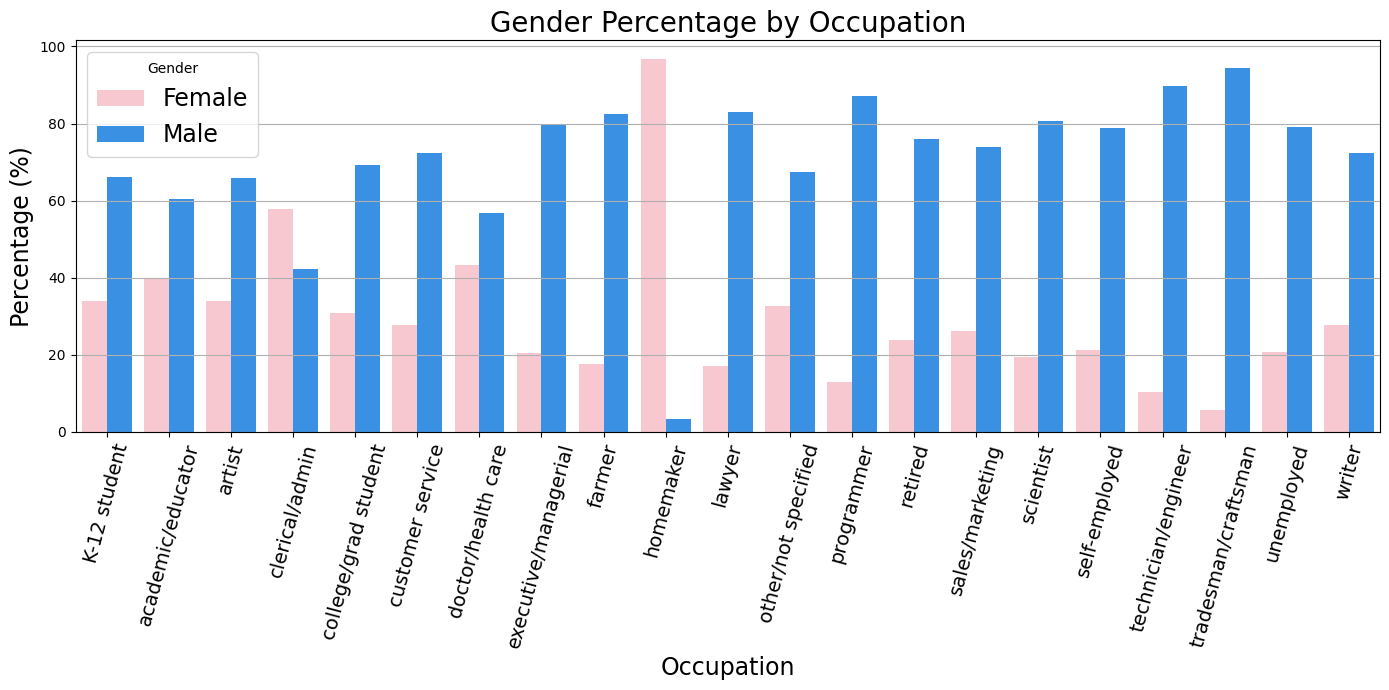

In [49]:
plt.figure(figsize=(14,7))
sns.barplot(
    data=occupation_gender_counts,
    x='Occupation_name',
    y='Percentage',
    hue='Gender_full',
    palette={'Male': 'dodgerblue', 'Female': 'pink'}
)
plt.xticks(rotation=75, fontsize=14)
plt.title('Gender Percentage by Occupation', fontsize=20)
plt.xlabel('Occupation', fontsize=17)
plt.ylabel('Percentage (%)', fontsize=17)
plt.legend(title='Gender', fontsize=17)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Location of Users

Zip-codes

Us Zipcodes are 5 digit number the first 3 representing the specific area or city. Altough this is not a foolproof method since some entirely different areas have the same 3 digit code so that is a problem.
And while most of these 3 digit numbers that are close to each other are also close to each other in real life, some aren't.

Since there are 6040 records and 3439 different zip codes it would be pretty useless to keep them this way.
The most people under a zip code is 19 people which is pretty insignificant

In [102]:
#Very small amount of people on the samed Zip-code
users.groupby('Zip-code').size().sort_values(ascending=False)

Zip-code
48104    19
22903    18
55104    17
94110    17
10025    16
         ..
00961     1
00926     1
00918     1
00693     1
00681     1
Length: 3439, dtype: int64

In [103]:
#All users
users['Zip-code'].count()

np.int64(6040)


Droping the last two digits would look like a good idea because it reduces sparsity, captures regional patterns more reliably (not always), avoids overfitting (to some degree), posibly improve prediction (not sure). 

In [104]:
#Cutting up Zip-codes
users_zip_prefix = users.copy()
users_zip_prefix['Zip_prefix'] = users_zip_prefix['Zip-code'].astype(str).str[:3]

users_zip_prefix.head()

,UserID,Gender,Age,Occupation,Zip-code,Zip_prefix
0,1,F,1,10,48067,480
1,2,M,56,16,70072,700
2,3,M,25,15,55117,551
3,4,M,45,7,02460,024
4,5,M,25,20,55455,554


Now only 678 unique values.
Much better but still not great. This solution is probably not the best and will be using states. That is a lot more general.

In [105]:

users_zip_prefix.groupby('Zip_prefix').size().sort_values(ascending=False)

Zip_prefix
554    172
100    162
551    146
941    137
021    109
      ... 
052      1
048      1
965      1
002      1
999      1
Length: 678, dtype: int64

Used these resources to match the zip codes with states:

https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2024&layergroup=ZIP+Code+Tabulation+Areas
https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
Admin 1 – States, Provinces

In [ ]:
#Load Zip Code Tabulation Areas
zctas = gpd.read_file('../data/tl_2024_us_zcta520/tl_2024_us_zcta520.shp')

print(zctas.columns)
print(zctas.head())

Index(['ZCTA5CE20', 'GEOID20', 'GEOIDFQ20', 'CLASSFP20', 'MTFCC20',
       'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20',
       'geometry'],
      dtype='object')
  ZCTA5CE20 GEOID20       GEOIDFQ20 CLASSFP20 MTFCC20 FUNCSTAT20  ALAND20  \
0     47236   47236  860Z200US47236        B5   G6350          S  1029063   
1     47870   47870  860Z200US47870        B5   G6350          S     8830   
2     47851   47851  860Z200US47851        B5   G6350          S    53326   
3     47337   47337  860Z200US47337        B5   G6350          S   303089   
4     47435   47435  860Z200US47435        B5   G6350          S    13302   

   AWATER20   INTPTLAT20    INTPTLON20  \
0         0  +39.1517426  -085.7252769   
1         0  +39.3701518  -087.4735141   
2         0  +39.5735839  -087.2459559   
3         0  +39.8027537  -085.4372850   
4         0  +39.2657557  -086.2951577   

                                            geometry  
0  POLYGON ((-85.7341 39.15597, -85.72794 39.15

In [ ]:
#Load state polygons
states = gpd.read_file('../data/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp')

print(states.columns)
print(states.head(10))

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)
           featurecla  scalerank adm1_code  diss_me iso_3166_2  \
0  Admin-1 scale rank          2  USA-3514     3514      US-MN   
1  Admin-1 scale rank          2  USA-3515     3515      US-MT   
2  Admin-1 scale rank          2  USA-3516     3516      US-ND   
3  Admin-1 scale rank          2  USA-3517     3517      US-HI   
4  Admin-1 scale rank          2  USA-3518     3518      US-ID   
5  Admin-1 scale rank          2  USA-3519     3519      US-WA   
6  Admin-1 scale rank          2  USA-3520     3520      US-AZ   
7  Admin-1 scale rank          2  USA-3521     3521      US-CA   
8  Admin-1 scale rank          2  USA-3522     3522      US-CO   
9  Admin-1 scale 

In [ ]:
#Filter only the United States states
states = states[states['admin'] == 'United States of America']

print(states.head(10))

           featurecla  scalerank adm1_code  diss_me iso_3166_2  \
0  Admin-1 scale rank          2  USA-3514     3514      US-MN   
1  Admin-1 scale rank          2  USA-3515     3515      US-MT   
2  Admin-1 scale rank          2  USA-3516     3516      US-ND   
3  Admin-1 scale rank          2  USA-3517     3517      US-HI   
4  Admin-1 scale rank          2  USA-3518     3518      US-ID   
5  Admin-1 scale rank          2  USA-3519     3519      US-WA   
6  Admin-1 scale rank          2  USA-3520     3520      US-AZ   
7  Admin-1 scale rank          2  USA-3521     3521      US-CA   
8  Admin-1 scale rank          2  USA-3522     3522      US-CO   
9  Admin-1 scale rank          2  USA-3523     3523      US-NV   

                                         wikipedia iso_a2  adm0_sr  \
0           http://en.wikipedia.org/wiki/Minnesota     US        1   
1             http://en.wikipedia.org/wiki/Montana     US        1   
2        http://en.wikipedia.org/wiki/North_Dakota     US      

In [ ]:
#Reproject to match coordinate systems
zctas = zctas.to_crs(states.crs)
#Spatial join ZIP -> State
zcta_with_state = gpd.sjoin(zctas, states, how='left', predicate='intersects')

print(zcta_with_state.head())

  ZCTA5CE20 GEOID20       GEOIDFQ20 CLASSFP20 MTFCC20 FUNCSTAT20  ALAND20  \
0     47236   47236  860Z200US47236        B5   G6350          S  1029063   
1     47870   47870  860Z200US47870        B5   G6350          S     8830   
2     47851   47851  860Z200US47851        B5   G6350          S    53326   
3     47337   47337  860Z200US47337        B5   G6350          S   303089   
4     47435   47435  860Z200US47435        B5   G6350          S    13302   

   AWATER20   INTPTLAT20    INTPTLON20  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
0         0  +39.1517426  -085.7252769  ...      None       None      None   
1         0  +39.3701518  -087.4735141  ...      None       None      None   
2         0  +39.5735839  -087.2459559  ...      None       None      None   
3         0  +39.8027537  -085.4372850  ...      None       None      None   
4         0  +39.2657557  -086.2951577  ...      None       None      None   

   FCLASS_GR FCLASS_IT  FCLASS_NL FCLASS_SE FCLASS_BD FCLASS_UA  FCL

In [ ]:
#Extract relevant columns
zip_to_state = zcta_with_state[['ZCTA5CE20', 'name']].rename(columns={
    'ZCTA5CE20': 'zip',
    'name': 'state'
})

print(zip_to_state.head(10))
print(zip_to_state.describe())
print(zip_to_state.info())

     zip    state
0  47236  Indiana
1  47870  Indiana
2  47851  Indiana
3  47337  Indiana
4  47435  Indiana
5  47514  Indiana
6  46045  Indiana
7  46206  Indiana
8  46704  Indiana
9  47585  Indiana
          zip  state
count   36407  36063
unique  33791     51
top     86514  Texas
freq        4   2055
<class 'pandas.core.frame.DataFrame'>
Index: 36407 entries, 0 to 33790
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     36407 non-null  object
 1   state   36063 non-null  object
dtypes: object(2)
memory usage: 853.3+ KB
None


In [ ]:
#Drop unmatched ZIPs
zip_to_state = zip_to_state.dropna()

#Make ZIP code string
zip_to_state['zip'] = zip_to_state['zip'].astype(str)

#Save to CSV
zip_to_state.to_csv("../data/zip_to_state/zip_to_state.csv", index=False)

In [113]:
#Merge on ZIP
merged_zip_to_state = users.merge(zip_to_state, left_on='Zip-code', right_on='zip', how='left')

print(merged_zip_to_state.head(10))

   UserID Gender  Age  Occupation Zip-code    zip          state
0       1      F    1          10    48067  48067       Michigan
1       2      M   56          16    70072  70072      Louisiana
2       3      M   25          15    55117  55117      Minnesota
3       4      M   45           7    02460  02460  Massachusetts
4       5      M   25          20    55455  55455      Minnesota
5       6      F   50           9    55117  55117      Minnesota
6       7      M   35           1    06810  06810    Connecticut
7       8      M   25          12    11413  11413       New York
8       9      M   25          17    61614  61614       Illinois
9      10      F   35           1    95370  95370     California


In [114]:
merged_zip_to_state['state'].value_counts()

state
California              1071
Minnesota                433
New Jersey               309
Texas                    305
Massachusetts            300
Illinois                 293
New York                 288
Michigan                 262
Ohio                     224
Washington               189
Pennsylvania             182
Virginia                 174
Florida                  157
Wisconsin                147
Oregon                   124
Colorado                 101
North Carolina            96
Maryland                  96
Tennessee                 96
Georgia                   90
Indiana                   88
Missouri                  81
Arizona                   81
Connecticut               80
Iowa                      57
Kentucky                  55
Maine                     52
New Hampshire             46
Kansas                    44
District of Columbia      43
Oklahoma                  41
Louisiana                 37
South Carolina            34
Nevada                    33
Utah    

C:\Users\Laptop\AppData\Local\Temp\ipykernel_132\2646618538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_zip_to_state, y='state', order=merged_zip_to_state['state'].value_counts().index, palette='viridis')


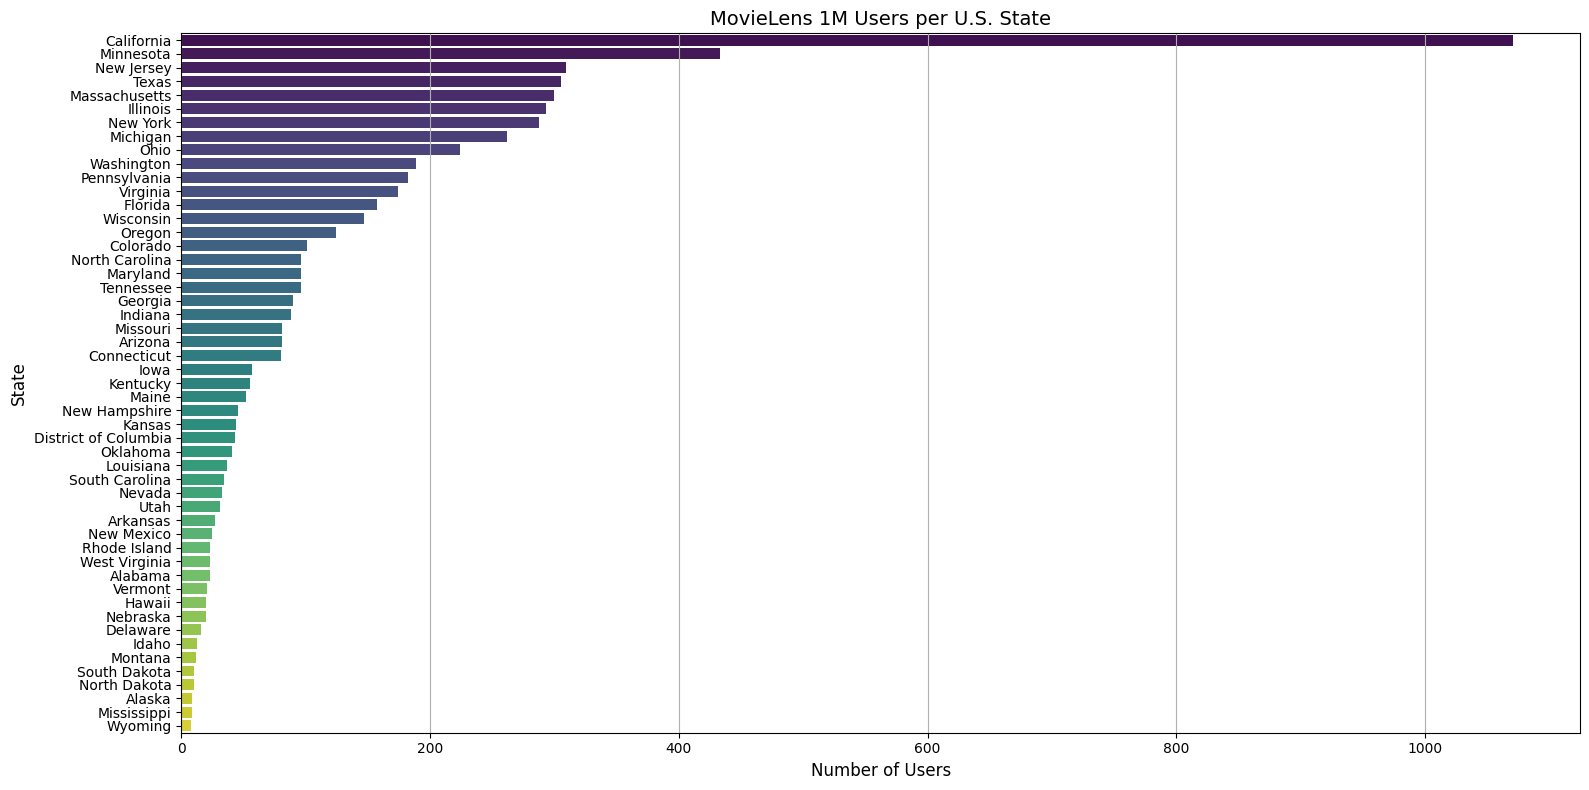

In [ ]:
#Plot: user count per state
plt.figure(figsize=(16, 8))
sns.countplot(data=merged_zip_to_state, y='state', order=merged_zip_to_state['state'].value_counts().index, palette='viridis')
plt.title('MovieLens 1M Users per U.S. State', fontsize=14)
plt.xlabel('Number of Users', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.grid(axis='x')
plt.show()

## Movies

In [64]:
movies_column_names = ["MovieID", "Title", "Genres"]

movies_path = '../data/ml-1m-(raw)/movies.dat'
movies = pd.read_csv(movies_path, header=None, sep='::', engine="python", names=movies_column_names, encoding="latin-1")

print(movies.head())

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [65]:
movies.describe()
#only ids so doesnt matter

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [66]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
duplicates = movies[movies.duplicated(keep=False)]
print(duplicates)
#no duplicates

Empty DataFrame
Columns: [MovieID, Title, Genres]
Index: []


### Movies by Genre

In [67]:
movies.groupby('Genres').size().sort_values(ascending=False)

Genres
Drama                                            843
Comedy                                           521
Horror                                           178
Comedy|Drama                                     162
Comedy|Romance                                   142
                                                ... 
Sci-Fi|Thriller|War                                1
Sci-Fi|War                                         1
Action|Adventure|Animation|Horror|Sci-Fi           1
Action|Adventure|Animation|Children's|Fantasy      1
Action|Adventure|Animation                         1
Length: 301, dtype: int64

In [68]:
#split genres into individual rows
movies_exploded = movies.assign(Genres=movies['Genres'].str.split('|')).explode('Genres')
print(movies_exploded.head())

   MovieID             Title      Genres
0        1  Toy Story (1995)   Animation
0        1  Toy Story (1995)  Children's
0        1  Toy Story (1995)      Comedy
1        2    Jumanji (1995)   Adventure
1        2    Jumanji (1995)  Children's


In [69]:
# Count movies per genre
genre_counts = movies_exploded['Genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Movie Count']  # Rename columns
print(genre_counts)

          Genre  Movie Count
0         Drama         1603
1        Comedy         1200
2        Action          503
3      Thriller          492
4       Romance          471
5        Horror          343
6     Adventure          283
7        Sci-Fi          276
8    Children's          251
9         Crime          211
10          War          143
11  Documentary          127
12      Musical          114
13      Mystery          106
14    Animation          105
15      Fantasy           68
16      Western           68
17    Film-Noir           44


In [70]:
movies_genre_count = movies_exploded.groupby('Genres').size().sort_values(ascending=False)

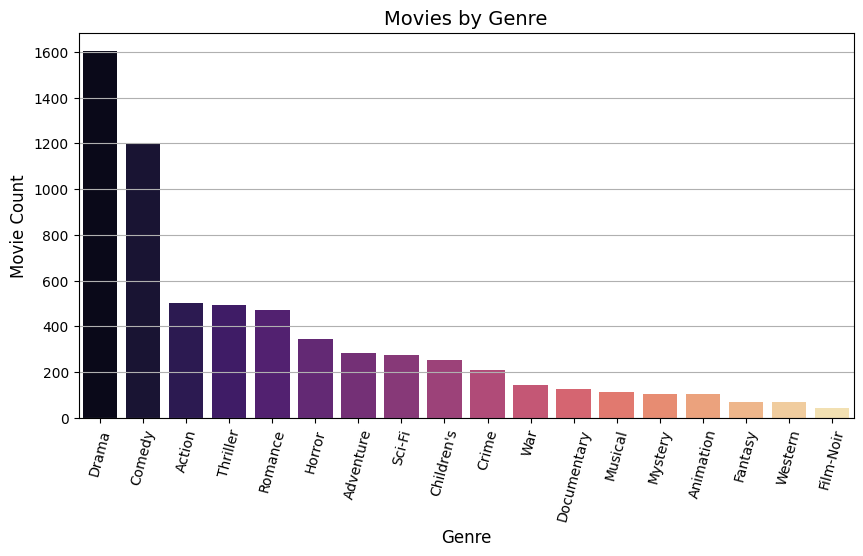

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=genre_counts,
    x='Genre',
    y='Movie Count',
    hue='Genre',
    palette='magma'
)
plt.title('Movies by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Movie Count', fontsize=12)
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.show()